# NSGA-II experiment with MAPE

In [1]:
import array
import random

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from deap import creator
from deap import base
from deap import tools
from deap.benchmarks.tools import hypervolume

import nsgaii.price as pr
import nsgaii.objectives as obj
import nsgaii.toolbox as tb
import nsgaii.search as sr
from nsgaii.eval import Evaluation
from nsgaii.battery import Battery

In [2]:
creator.create('FitnessMin', base.Fitness, weights=(-1.0, -1.0, -1.0, -1.0))
creator.create('Individual', array.array, typecode='d', fitness=creator.FitnessMin)

In [3]:
# dimenzionalita problemu, AKA pocet dimenzii
NDIM = 24
BOUND_LOW = 0
BOUND_UP = 10
GENS = 400
POPULATION_SIZE = 400

# Recommendation for average winter day

## Mape as a distance function

In [4]:
df = pd.read_csv('.exports/aggregations/average_winter_day.csv', delimiter=',')
actual = df['use'].as_matrix()
pv   = df['gen'].as_matrix()
print('Price of predicted solution: %f'%obj.cost_function_with_mape(actual, pv, None, actual)[0])

Price of predicted solution: 0.801744


In [5]:
%%time

# first of all, no battery
toolbox_wob = tb.setup(actual, pv, NDIM, BOUND_LOW, BOUND_UP)
pop_wob, logbook_wob = sr.search(toolbox_wob, gens=GENS, verbose=False)

# battery with 3 kWh
battery = Battery(3,0)
toolbox_b_3 = tb.setup(actual, pv, NDIM, BOUND_LOW, BOUND_UP, battery)
pop_b_3, logbook_b_3 = sr.search(toolbox_b_3, gens=GENS, verbose=False)

# battery with 5 kWh
battery = Battery(5,0)
toolbox_b_5 = tb.setup(actual, pv, NDIM, BOUND_LOW, BOUND_UP, battery)
pop_b_5, logbook_b_5 = sr.search(toolbox_b_5, gens=GENS, verbose=False)

Wall time: 1min 54s


### Average winter day - no battery, mape

Number of solutions: 32
Lowest price solution: cost: 0.342885, distance 470.500757, diff 0.015677
Highest comfort solution: cost: 0.430982, distance 157.379553, diff 0.001125


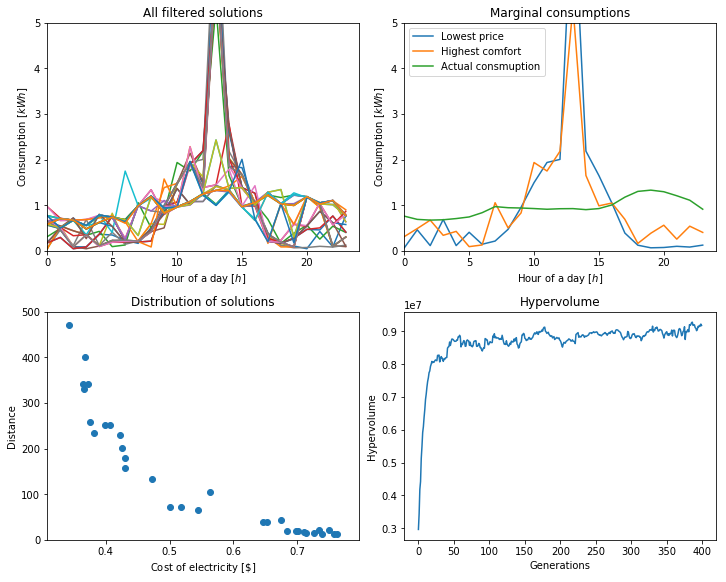

In [6]:
ev = Evaluation(pop_wob, toolbox_wob, logbook_wob, actual, distance_treshold=500)
ev.plot()
print(ev)
plt.savefig('winter day no battery.jpg', dpi=500)

### Average winter day - 3kWh battery, mape

Number of solutions: 26
Lowest price solution: cost: 0.279029, distance 102.874236, diff 0.004308
Highest comfort solution: cost: 0.469899, distance 15.057139, diff 0.000005


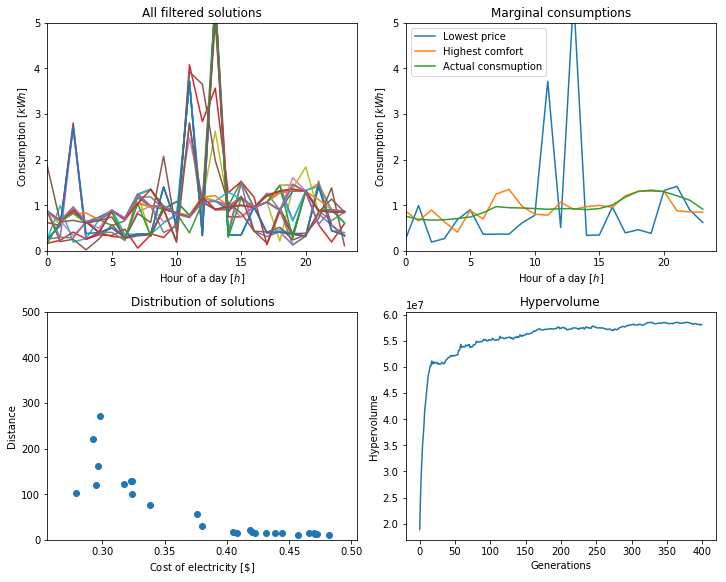

In [7]:
ev = Evaluation(pop_b_3, toolbox_b_3, logbook_b_3, actual, distance_treshold=500)
ev.plot()
print(ev)

### Average winter day - 5kWh battery, mape

Number of solutions: 31
Lowest price solution: cost 0.210439, MAPE 81.525684, diff 0.000000
Lowest MAPE  solution: cost 0.332181, MAPE 14.797041, diff 0.221137
Price of predicted solution: 0.801744


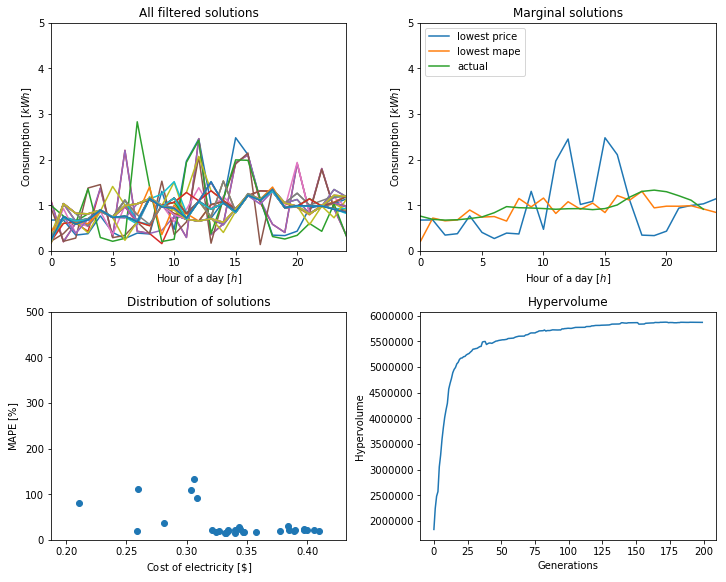

In [9]:
filter_and_visualize_results(pop_b_5, toolbox_b_5, logbook_b_5, actual, obj.cost_function_with_mape, treshold=500)

In [18]:
%%time

def get_averages(toolbox, actual, pv, iterations=10):
    results = []
    
    for i in range(0,iterations):
        print('Iteration: %d'%i)
        pop, logbook = sr.search(toolbox, gens=GENS, verbose=False)
        
        filtered = get_results(pop, toolbox)

        lowest_price = filtered[filtered[:,0].argmin(),:]        
        
        results.append([lowest_price[0], lowest_price[1]])
    
    return np.array(results)

toolbox_wob = tb.setup(actual, pv, NDIM, BOUND_LOW, BOUND_UP, None)
results = get_averages(toolbox_wob, actual, pv)
print('No battery')
print('Mean', results.mean(axis=0).tolist())
print('Std', results.std(axis=0).tolist())

# battery with 3 kWh
battery = Battery(3,0)
toolbox_b3 = tb.setup(actual, pv, NDIM, BOUND_LOW, BOUND_UP, battery)
results = get_averages(toolbox_b3, actual, pv)
print('3kWh battery')
print('Mean', results.mean(axis=0).tolist())
print('Std', results.std(axis=0).tolist())

# battery with 5 kWh
battery = Battery(5,0)
toolbox_b5 = tb.setup(actual, pv, NDIM, BOUND_LOW, BOUND_UP, battery)
results = get_averages(toolbox_b5, actual, pv)

print('5kWh battery')
print('Mean', results.mean(axis=0).tolist())
print('Std', results.std(axis=0).tolist())

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
No battery
Mean [0.31433599604203527, 21523184081.31888]
Std [0.022146206557167744, 51760462702.646255]
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
3kWh battery
Mean [0.2894455706567912, 728.2582633242778]
Std [0.01134963358661556, 1143.5638446775813]
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
5kWh battery
Mean [0.285100285678267, 1515.8749503521794]
Std [0.011088732136048515, 2204.21720620295]
Wall time: 5min 27s


In [19]:
results.mean(axis=0).tolist()

[0.285100285678267, 1515.8749503521794]

## Euclidean distance as a distance function

In [12]:
%%time

# first of all, no battery
toolbox_wob = tb.setup(actual, pv, NDIM, BOUND_LOW, BOUND_UP, distance='euclidean')
pop_wob, logbook_wob = sr.search(toolbox_wob, gens=GENS, verbose=False)

# battery with 3 kWh
battery = Battery(3,0)
toolbox_b_3 = tb.setup(actual, pv, NDIM, BOUND_LOW, BOUND_UP, battery, distance='euclidean')
pop_b_3, logbook_b_3 = sr.search(toolbox_b_3, gens=GENS, verbose=False)

# battery with 5 kWh
battery = Battery(5,0)
toolbox_b_5 = tb.setup(actual, pv, NDIM, BOUND_LOW, BOUND_UP, battery, distance='euclidean')
pop_b_5, logbook_b_5 = sr.search(toolbox_b_5, gens=GENS, verbose=False)

Wall time: 1min 44s


### Average winter day, no battery, euclidean

Number of solutions: 44
Lowest price solution: cost 0.295186, MAPE 7.188338, diff 0.370351
Lowest MAPE  solution: cost 0.798997, MAPE 0.475655, diff 0.015873
Price of predicted solution: 0.801744
Wall time: 35.2 s


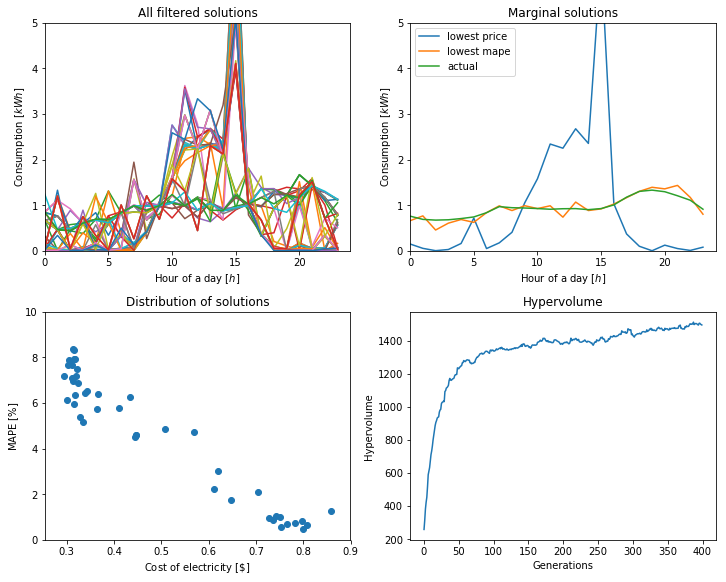

In [7]:
%%time

# first of all, no battery
toolbox_wob = tb.setup(actual, pv, NDIM, BOUND_LOW, BOUND_UP, distance='euclidean')
pop_wob, logbook_wob = sr.search(toolbox_wob, gens=GENS, verbose=False)

filter_and_visualize_results(pop_wob, toolbox_wob, logbook_wob, actual, obj.cost_function_with_euclidean, treshold=10)
plt.savefig('winter day no battery.jpg', dpi=500)

Number of solutions: 44
Lowest price solution: cost: 0.295186, distance 7.188338, diff 0.370351
Highest comfort solution: cost: 0.750369, distance 0.992697, diff 0.000000


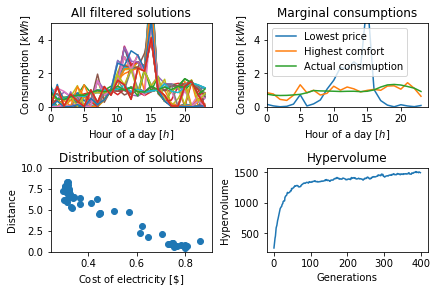

In [10]:
ev = Evaluation(pop_wob, toolbox_wob, logbook_wob, actual, 10)
ev.plot()
print(ev)

In [18]:
objective_values = np.array([toolbox_wob.evaluate(x) for x in pop_wob])
filtered_pop = pop_wob[np.where(
            objective_values[:,2] <= 0.5
           
            )]

TypeError: list indices must be integers or slices, not tuple

In [39]:
np.where((objective_values[:,2] <= 0.5) & (objective_values[:,1] <= 10))[0].tolist()

[3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 18,
 19,
 28,
 30,
 33,
 38,
 40,
 45,
 49,
 50,
 55,
 57,
 60,
 71,
 77,
 86,
 93,
 106,
 112,
 124,
 140,
 141,
 146,
 177,
 197]

In [51]:
np.array(pop_wob)[np.where(
            (objective_values[:,2] <= 0.5)
            & (objective_values[:,1] <= 10)
            )[0]]

array([[  2.32559947e-01,   2.23360834e-02,   2.20409565e-01,
          8.33358581e-04,   7.34784015e-03,   6.93926644e-03,
          3.35712681e-02,   1.73852933e-01,   4.57318495e-01,
          1.39845559e+00,   1.51592176e+00,   3.10785714e+00,
          2.70830640e+00,   2.40077664e+00,   2.28204549e+00,
          6.45470568e+00,   1.01784428e+00,   3.67980262e-01,
          8.55527435e-02,   1.16719576e-03,   1.74248232e-02,
          1.45143013e-03,   5.61055560e-04,   1.08299410e-02],
       [  4.62867789e-02,   1.79758832e-03,   7.18001592e-02,
          8.98107636e-02,   7.17861843e-03,   7.93207273e-03,
          1.13114823e-02,   9.94022249e-01,   4.50260450e-01,
          1.10673318e+00,   1.51435600e+00,   3.04980303e+00,
          2.68460076e+00,   2.42405131e+00,   1.96569861e+00,
          6.53231619e+00,   1.01783530e+00,   3.77796011e-01,
          8.17347473e-02,   7.45527250e-04,   5.34565090e-03,
          3.25782347e-03,   3.62134070e-01,   6.79365165e-03],
      

In [50]:
pop_wob

[array('d', [0.0046356077770427625, 0.0007072481589857627, 0.00014669446958323574, 0.005014727964587257, 0.00015063776028392296, 0.0004944581262139487, 0.0073467516813794445, 0.04404546948412457, 0.12047749758873899, 0.21438121400068574, 0.2676702922633637, 0.23985834200173617, 0.46116992068855384, 0.35870256237845277, 0.38334695026702503, 0.30846347459381984, 0.13553269242673127, 0.21081283002085527, 0.0068538339270709635, 0.0014323896948169083, 0.006497513572358898, 0.0008686721681934359, 0.0011603866811163827, 6.10693012836679e-05]),
 array('d', [0.025762661454047802, 0.0019173080445191526, 0.00014913067946438832, 0.05365971225857584, 0.0025286627747936057, 0.025941210589984706, 0.014114707605708073, 0.027820669606246285, 0.0063405017731192614, 0.009476700032576835, 0.07806298710229934, 0.12080757078102611, 0.2107178151681543, 0.3577889219807134, 0.38474149032684496, 0.2965835906032926, 0.13582973641890597, 0.010496158928860619, 0.005506628872411115, 0.001432907245182436, 0.00654047

### Average winter day, 3kWh battery, euclidean

Number of solutions: 28
Lowest price solution: cost 0.296625, MAPE 4.521998, diff 0.300047
Lowest MAPE  solution: cost 0.504850, MAPE 0.618746, diff 0.023349
Price of predicted solution: 0.801744


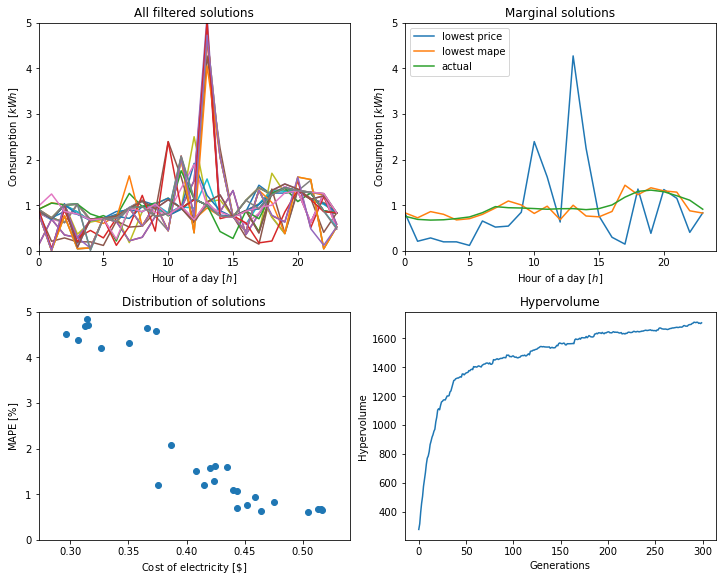

In [8]:
filter_and_visualize_results(pop_b_3, toolbox_b_3, logbook_b_3, actual, obj.cost_function_with_euclidean, treshold=5)

### Average winter day, 5kWh battery, euclidean

Number of solutions: 44
Lowest price solution: cost 0.231070, MAPE 0.793429, diff 0.000001
Lowest MAPE  solution: cost 0.372520, MAPE 0.590870, diff 0.100861
Price of predicted solution: 0.801744


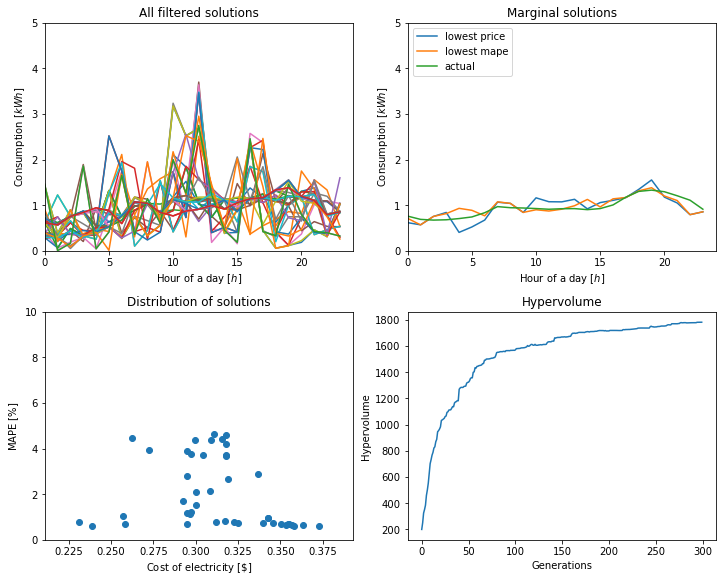

In [10]:
filter_and_visualize_results(pop_b_5, toolbox_b_5, logbook_b_5, actual, obj.cost_function_with_euclidean, treshold=10)

# Recommendation for average summer day

In [21]:
df = pd.read_csv('.exports/aggregations/average_summer_day.csv', delimiter=',')
actual = df['use'].as_matrix()
pv   = df['gen'].as_matrix()
print('Price of predicted solution: %f'%obj.cost_function_with_mape(actual, pv, None, actual)[0])

Price of predicted solution: 1.271188


In [22]:
def get_averages(toolbox, actual, pv, iterations=10):
    results = []
    
    for i in range(0,iterations):
        print('Iteration: %d'%i)
        pop, logbook = sr.search(toolbox, gens=GENS, verbose=False)
        
        filtered = get_results(pop, toolbox)

        lowest_price = filtered[filtered[:,0].argmin(),:]        
        
        results.append([lowest_price[0], lowest_price[1]])
    
    return np.array(results)

toolbox_wob = tb.setup(actual, pv, NDIM, BOUND_LOW, BOUND_UP, None)
results = get_averages(toolbox_wob, actual, pv)
print('No battery')
print('Mean', results.mean(axis=0).tolist())
print('Std', results.std(axis=0).tolist())

# battery with 3 kWh
battery = Battery(3,0)
toolbox_b3 = tb.setup(actual, pv, NDIM, BOUND_LOW, BOUND_UP, battery)
results = get_averages(toolbox_b3, actual, pv)
print('3kWh battery')
print('Mean', results.mean(axis=0).tolist())
print('Std', results.std(axis=0).tolist())

# battery with 5 kWh
battery = Battery(5,0)
toolbox_b5 = tb.setup(actual, pv, NDIM, BOUND_LOW, BOUND_UP, battery)
results = get_averages(toolbox_b5, actual, pv)

print('5kWh battery')
print('Mean', results.mean(axis=0).tolist())
print('Std', results.std(axis=0).tolist())

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
No battery
Mean [0.6931675440345405, 231083738733.17813]
Std [0.032042820579434854, 616610089481.6862]
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
3kWh battery
Mean [0.658142474819784, 46644114.53498435]
Std [0.006686477447806926, 101757069.38859765]
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
5kWh battery
Mean [0.6551031349816394, 7648.1169848166755]
Std [0.015726158295857846, 15272.464614780722]


In [23]:
%%time

# first of all, no battery
toolbox_wob = tb.setup(actual, pv, NDIM, BOUND_LOW, BOUND_UP)
pop_wob, logbook_wob = sr.search(toolbox_wob, gens=GENS, verbose=False)

# battery with 3 kWh
battery = Battery(3,0)
toolbox_b_3 = tb.setup(actual, pv, NDIM, BOUND_LOW, BOUND_UP, battery)
pop_b_3, logbook_b_3 = sr.search(toolbox_b_3, gens=GENS, verbose=False)

# battery with 5 kWh
battery = Battery(5,0)
toolbox_b_5 = tb.setup(actual, pv, NDIM, BOUND_LOW, BOUND_UP, battery)
pop_b_5, logbook_b_5 = sr.search(toolbox_b_5, gens=GENS, verbose=False)

Wall time: 38.1 s


## Average summer day - no battery

Number of solutions: 24
Lowest price solution: cost 0.726605, MAPE 94.680491, diff 0.170253
Lowest MAPE  solution: cost 1.099745, MAPE 18.538983, diff 0.429988
Price of predicted solution: 1.271188


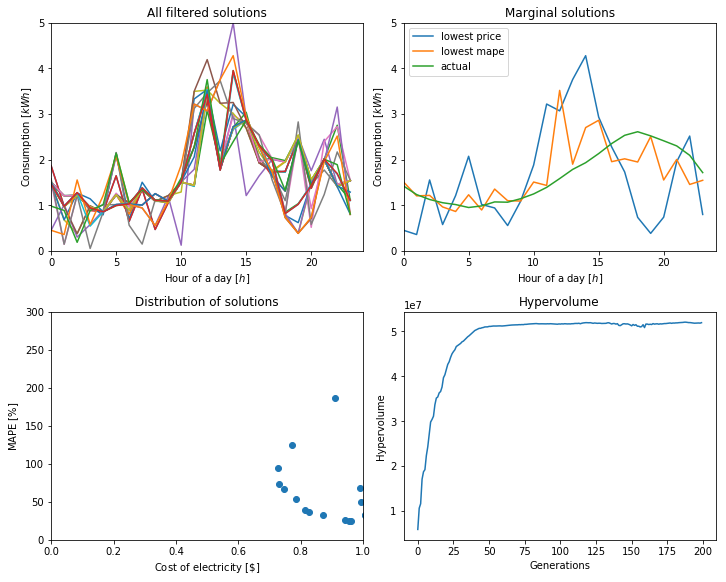

In [25]:
filter_and_visualize_results(pop_wob, toolbox_wob, logbook_wob, actual, obj.cost_function_with_mape)

## Average summer day - 3kWh battery

Number of solutions: 14
Lowest price solution: cost 0.668573, MAPE 40.544248, diff 0.160431
Lowest MAPE  solution: cost 0.855751, MAPE 16.407217, diff 0.116757
Price of predicted solution: 1.271188


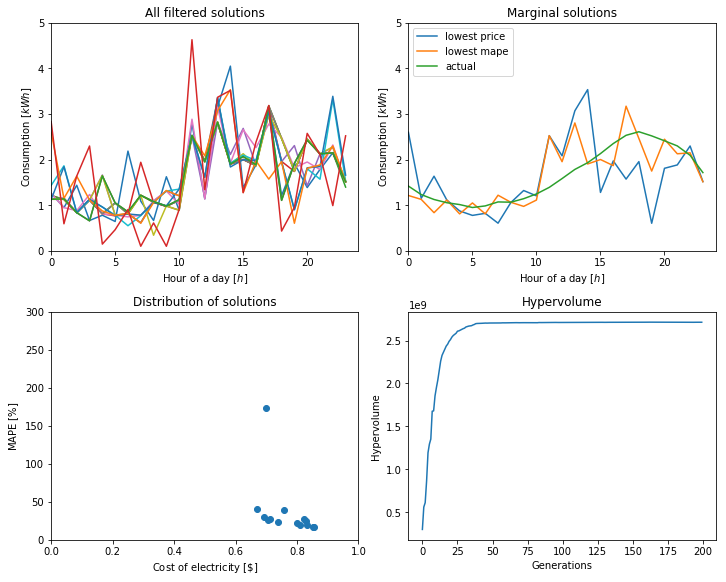

In [27]:
filter_and_visualize_results(pop_b_3, toolbox_b_3, logbook_b_3, actual, obj.cost_function_with_mape)

## Average summer day - 5 kWh battery

Number of solutions: 8
Lowest price solution: cost 0.660539, MAPE 28.075807, diff 0.386684
Lowest MAPE  solution: cost 0.662913, MAPE 13.439616, diff 0.371865
Price of predicted solution: 1.271188


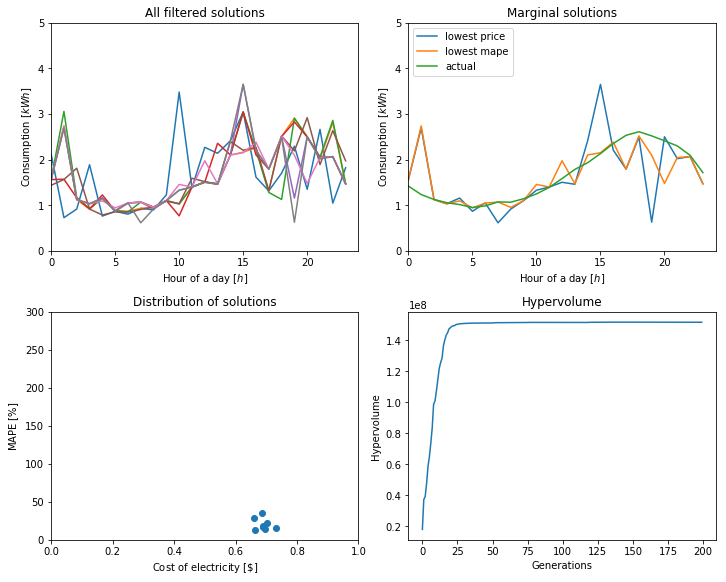

In [28]:
filter_and_visualize_results(pop_b_5, toolbox_b_5, logbook_b_5, actual, obj.cost_function_with_mape)

# Euclidean distance as a distance function

In [15]:
'0'.join(['1','2','3'])

'10203'

In [21]:
'%d %d %d' % [*np.array([1,2,3])]

TypeError: %d format: a number is required, not list